In [2]:
import seaborn as sns
import json
from helper_functions import get_user_ratings_df
import pandas as pd
import matplotlib.pyplot as plt
import json


restaurants_url = "https://raw.githubusercontent.com/Papagoat/brain-assessment/main/restaurant_data.json"

ratings_df = pd.DataFrame(get_user_ratings_df(restaurants_url))
print(ratings_df)
# Sort categories in the expected order
rating_order = ["Poor", "Average", "Good", "Very Good", "Excellent"]
ratings_df["user_rating_texts"] = pd.Categorical(ratings_df["user_rating_texts"], categories=rating_order, ordered=True)

# Descriptive statistics: to get min & max aggregate rating values given by users for diff rating texts
thresholds = ratings_df.groupby("user_rating_texts")["user_rating_value"].agg(["min", "max", "mean"]).reset_index()
print(thresholds)


Extracted details for 1300 events
      user_rating_value user_rating_texts
0                   4.4         Very Good
1                   4.6         Excellent
2                   4.1         Very Good
3                   4.4         Very Good
4                   4.4         Very Good
...                 ...               ...
1295                4.2         Very Good
1296                4.0         Very Good
1297                3.8              Good
1298                4.7         Excellent
1299                3.9              Good

[1300 rows x 2 columns]
  user_rating_texts  min  max      mean
0              Poor  2.2  2.2  2.200000
1           Average  2.5  3.4  3.193333
2              Good  3.5  3.9  3.776224
3         Very Good  4.0  4.4  4.215891
4         Excellent  4.5  4.9  4.666207


C:\Users\alyss\AppData\Local\Temp\ipykernel_12576\4286537010.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thresholds = ratings_df.groupby("user_rating_texts")["user_rating_value"].agg(["min", "max", "mean"]).reset_index()


#Box Plot of User Aggregate Ratings and Rating Texts

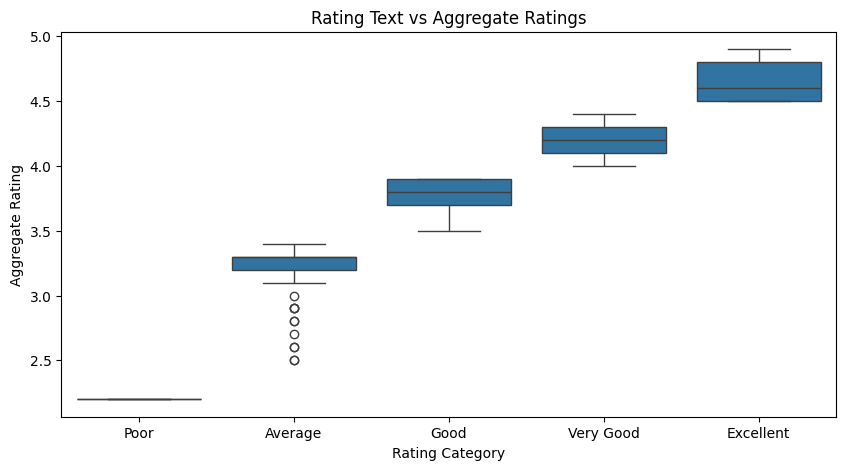


Statistics for Poor:
  - Minimum: 2.2
  - 25th Percentile (Q1): 2.2
  - Median (Q2): 2.2
  - 75th Percentile (Q3): 2.2
  - Maximum: 2.2
  - Interquartile Range (IQR): 0.0

Statistics for Average:
  - Minimum: 2.5
  - 25th Percentile (Q1): 3.2
  - Median (Q2): 3.3
  - 75th Percentile (Q3): 3.3
  - Maximum: 3.4
  - Interquartile Range (IQR): 0.09999999999999964

Statistics for Good:
  - Minimum: 3.5
  - 25th Percentile (Q1): 3.7
  - Median (Q2): 3.8
  - 75th Percentile (Q3): 3.9
  - Maximum: 3.9
  - Interquartile Range (IQR): 0.19999999999999973

Statistics for Very Good:
  - Minimum: 4.0
  - 25th Percentile (Q1): 4.1
  - Median (Q2): 4.2
  - 75th Percentile (Q3): 4.3
  - Maximum: 4.4
  - Interquartile Range (IQR): 0.20000000000000018

Statistics for Excellent:
  - Minimum: 4.5
  - 25th Percentile (Q1): 4.5
  - Median (Q2): 4.6
  - 75th Percentile (Q3): 4.8
  - Maximum: 4.9
  - Interquartile Range (IQR): 0.2999999999999998


In [3]:
# Boxplot Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x="user_rating_texts", y="user_rating_value", data=ratings_df, order=rating_order)
plt.title("Rating Text vs Aggregate Ratings")
plt.xlabel("Rating Category")
plt.ylabel("Aggregate Rating")
plt.show()

for category in rating_order:
    data = ratings_df[ratings_df['user_rating_texts'] == category]['user_rating_value']
    stats = data.describe()
    print(f"\nStatistics for {category}:")
    print(f"  - Minimum: {stats['min']}")
    print(f"  - 25th Percentile (Q1): {stats['25%']}")
    print(f"  - Median (Q2): {stats['50%']}")
    print(f"  - 75th Percentile (Q3): {stats['75%']}")
    print(f"  - Maximum: {stats['max']}")
    print(f"  - Interquartile Range (IQR): {stats['75%'] - stats['25%']}")

Strong Correlation: 
Upward trend in the median aggregate rating as we move from "Poor" to "Excellent," confirming that the qualitative descriptions generally align with the quantitative scores.
Consistency in "Poor" and "Average": 
The "Poor" category shows no variability (IQR = 0), indicating that all ratings in this category were exactly 2.2. Similarly, the "Average" category has a very small IQR, suggesting that users are fairly consistent in their interpretation of what constitutes an "average" experience, typically around 3.2 to 3.3.
Increasing Spread: 
The IQR for ratings with the text "Excellent," increases, indicating a wider spread of ratings within those categories. This suggests that users have more diverse interpretations of what constitutes "Good," "Very Good," and "Excellent" experiences.
"Excellent" has the Widest Range: 
The "Excellent" category has the largest IQR, implying a broader range of ratings despite having a higher minimum value

#Scatter Plot of Aggregate Ratings by Texts

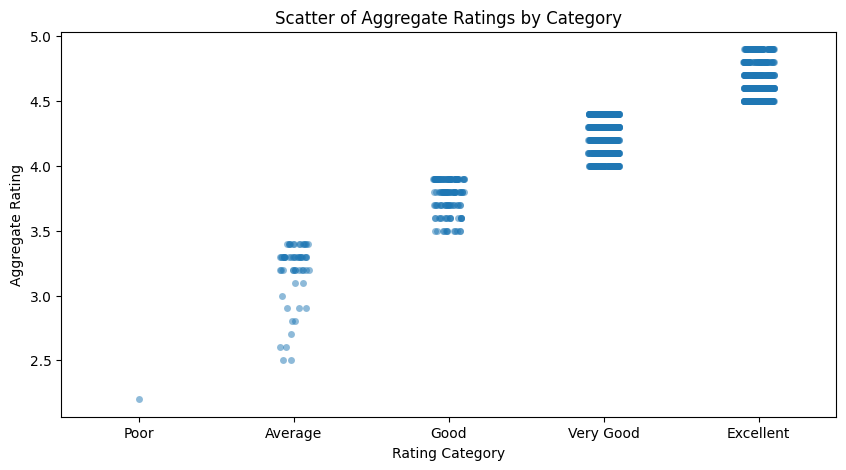

In [4]:
# Scatterplot for detailed distribution on upper, lower quartile, median, outliers & spread of aggregate rating values
plt.figure(figsize=(10, 5))
sns.stripplot(x="user_rating_texts", y="user_rating_value", data=ratings_df, order=rating_order, jitter=True, alpha=0.5)
plt.title("Scatter of Aggregate Ratings by Category")
plt.xlabel("Rating Category")
plt.ylabel("Aggregate Rating")
plt.show()

There is an upward trend in aggregate ratings as the user rating text moves from "Poor" to "Excellent" demonstrating a correlation with higher aggregate ratings associated with more positive rating texts. The is also a clear clustering of aggregate ratings within each aggregate rating band even within the individual categories, indicating the majority of the aggregat ratings for rating tests Good, Very Good and Excellent hover around the same aggregate rating values. 

#Histogram of Aggregate Rating Distribution by Count

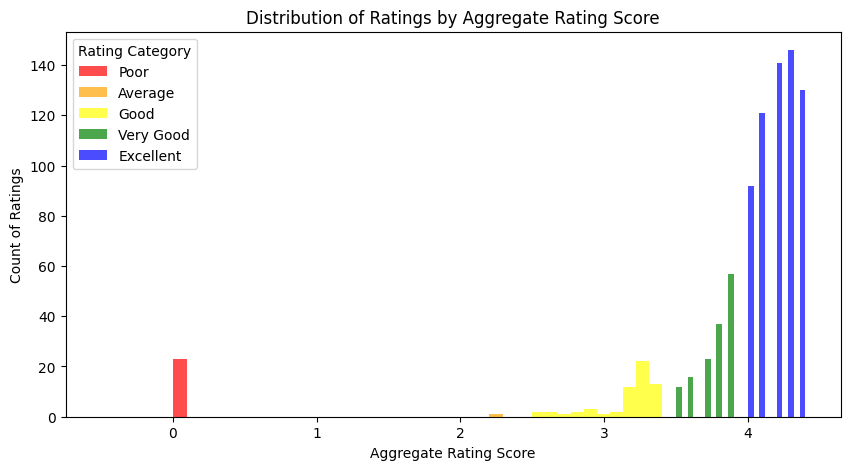

In [ ]:
#Histogram showing Distribution of all aggregate 
bins = [0, 2.2, 2.5, 3.5, 4.0, 4.5]  
categories = ["Poor", "Average", "Good", "Very Good", "Excellent"]
colors = ["red", "orange", "yellow", "green", "blue"]

# Assign each rating to a category
ratings_df["rating_category"] = pd.cut(ratings_df["user_rating_value"], bins=bins, labels=categories, right=False)

# Plot the histogram with colored bins
plt.figure(figsize=(10, 5))

# Loop through categories and plot each bin separately
for i in range(len(bins) - 1):
    subset = ratings_df[(ratings_df["user_rating_value"] >= bins[i]) & 
                        (ratings_df["user_rating_value"] < bins[i+1])]
    plt.hist(subset["user_rating_value"], bins=10, color=colors[i], alpha=0.7, label=categories[i])

plt.xlabel("Aggregate Rating Score")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings by Aggregate Rating Score")
plt.legend(title="Rating Category")

Majority of the aggregate ratings of users are distributed aound values 4 and above.

#Pie Chart of User Ratings by Category

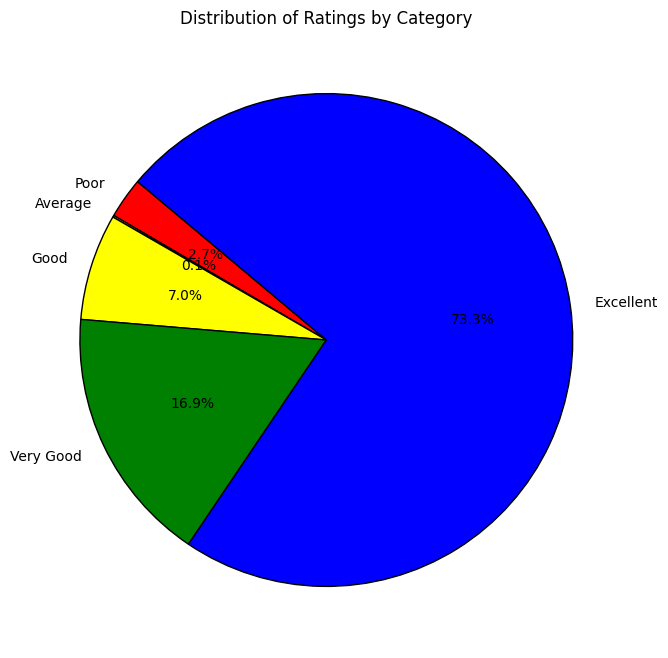

In [ ]:
rating_counts = ratings_df["rating_category"].value_counts().reindex(["Poor", "Average", "Good", "Very Good", "Excellent"])
colors = ["red", "orange", "yellow", "green", "blue"]

plt.figure(figsize=(8, 8))
plt.pie(
    rating_counts, 
    labels=rating_counts.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)

plt.title("Distribution of Ratings by Category")
plt.show()

Majority of users gave ratings 4 and above attributing to a significantly larger proportion of rating texts with 'Excellent' compared to the other texts. 